In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import re
import string
import functions
import sklearn
import pickle
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


Reading data sets of fake and true news. Exlporing the data on NA, Missing lines and etc

In [95]:
news=pd.read_csv('../Data/news.zip', compression='zip')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [96]:
fakenews = pd.read_csv("../Data/Fake.csv.zip", compression = "zip")
fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [97]:
truenews = pd.read_csv("../Data/True.csv.zip", compression = "zip")
truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [98]:
fakenews.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [99]:
truenews.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [100]:
fakenews.info()
#23481 news 
#dates are object, but I am not sure if I will use the dates later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [101]:
truenews.info()
#21417 true news.
#There is no imbalance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [102]:
truenews['label']=1
truenews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [103]:
fakenews['label']=0
fakenews.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [104]:
merged_df = pd.concat([fakenews, truenews], axis =0 )
merged_df.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [105]:
merged_copy_df=merged_df.copy()

In [106]:
merged_df.shape

(44898, 5)

Let's remove the columns thata are not relevant and shuffle the news

In [107]:
merged_df=merged_df.drop(['title','subject', 'date'], axis=1)


In [108]:
merged_df=merged_df.sample(frac=1)

In [109]:
merged_df.head()

,text,label
469,WASHINGTON (Reuters) - The top Democrat on the...,1
20552,BARCELONA (Reuters) - Barcelona s mayor has as...,1
821,"John McCain, the Panama-born senior United Sta...",0
357,WASHINGTON (Reuters) - Former national securit...,1
21905,Insane! This really is the definition of insan...,0


In [110]:
merged_df.reset_index(inplace=True)


In [111]:
merged_df.drop(['index'], axis=1, inplace=True)
merged_df.head()

,text,label
0,WASHINGTON (Reuters) - The top Democrat on the...,1
1,BARCELONA (Reuters) - Barcelona s mayor has as...,1
2,"John McCain, the Panama-born senior United Sta...",0
3,WASHINGTON (Reuters) - Former national securit...,1
4,Insane! This really is the definition of insan...,0


Writing a function to clean up the text from not important charachters.

In [112]:
merged_df['text']=merged_df['text'].apply(functions.clean_up)


In [113]:
merged_df.head()

,text,label
0,washington reuters the top democrat on the sen...,1
1,barcelona reuters barcelona s mayor has asked ...,1
2,john mccain the panama born senior united stat...,0
3,washington reuters former national security ad...,1
4,insane this really is the definition of insani...,0


X/y and train-test split

In [114]:
X = merged_df["text"]
y = merged_df["label"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Let's convert a collection of raw documents to a matrix of TF-IDF features. TF =Term Frequency. IDF = Inverse Document Frequency. TF tells the number of time a word appears in the document, and IDF tells how significant a term is in the entire corpus

In [116]:
vectorization_text = TfidfVectorizer()
X_vect_train = vectorization_text.fit_transform(X_train)
X_vect_test = vectorization_text.transform(X_test)

In [117]:
#vectorization_text = functions.load("../Vectorizers/vectorization_text.pickle")

In [118]:
filename = "../Vectorizers/vectorization_text.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(vectorization_text,file) # store it #after fitting we save it

This task is a classification task, we predict if the news are real or fake. 
I decided to use few models Logistic Regression, Passive Agressive Classifier and a Random Forest Classifier

In [119]:
lr = LogisticRegression()
lr.fit(X_vect_train,y_train)

LogisticRegression()

In [120]:
filename = "../Models/lr.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(lr,file) # store it #after fitting we save it

In [121]:
y_pred_train=lr.predict(X_vect_train)
lr.score(X_vect_train, y_train)
print("The accuracy of the model in the Train set is: ",round(lr.score(X_vect_train, y_train),3))
print("The Kappa in the Train set is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
print(classification_report(y_train, y_pred_train))

The accuracy of the model in the Train set is:  0.992
The Kappa in the Train set is: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16491
           1       0.99      0.99      0.99     14937

    accuracy                           0.99     31428
   macro avg       0.99      0.99      0.99     31428
weighted avg       0.99      0.99      0.99     31428



In [122]:
y_pred_test=lr.predict(X_vect_test)
lr.score(X_vect_test, y_test)
print("The accuracy of the model in the Test set is: ",round(lr.score(X_vect_test, y_test),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test))

The accuracy of the model in the Test set is:  0.985
The Kappa in the Test set is: 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6990
           1       0.98      0.99      0.98      6480

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



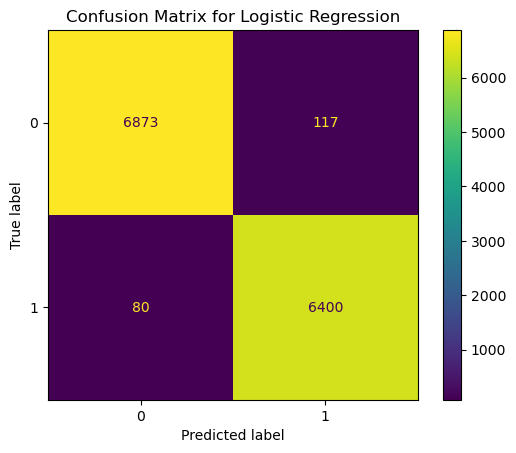

In [123]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Logistic Regression')
plt.show()
#So with this model, we have 6936 true positives, 6358 true negatives, 82 false positives, and 94 false negatives.

Passive Aggressive Classifier belongs to the category of online learning algorithms in machine learning. It works by responding as passive for correct classifications and responding as aggressive for any miscalculation.

In [124]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_vect_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [125]:
filename = "../Models/pac.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(pac,file) # store it #after fitting we save it

In [126]:
y_pred_train_pac=pac.predict(X_vect_train)
print("The accuracy of the model in the Test set is: ",round(pac.score(X_vect_train, y_train),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train_pac)))
print(classification_report(y_train, y_pred_train_pac))

The accuracy of the model in the Test set is:  1.0
The Kappa in the Test set is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16491
           1       1.00      1.00      1.00     14937

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428



In [127]:
y_pred_test_pac=pac.predict(X_vect_test)
print("The accuracy of the model in the Test set is: ",round(pac.score(X_vect_test, y_test),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test_pac)))
print(classification_report(y_test, y_pred_test_pac))

The accuracy of the model in the Test set is:  0.995
The Kappa in the Test set is: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6990
           1       1.00      0.99      0.99      6480

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



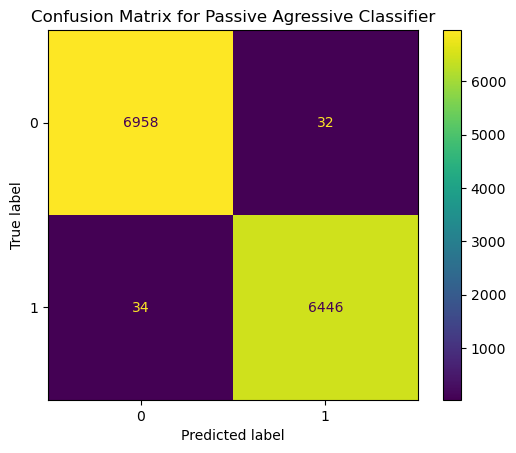

In [128]:
cm_test_1 = confusion_matrix(y_test,y_pred_test_pac)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_1, display_labels=pac.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Passive Agressive Classifier')
plt.show()

Building model - Random Forest Classifier

In [129]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_vect_train, y_train)

RandomForestClassifier(random_state=0)

In [130]:
filename = "../Models/rfc.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(rfc,file) # store it #after fitting we save it

In [131]:
y_pred_train_rfc = rfc.predict(X_vect_train)
print("The accuracy of the model in the Test set is: ",round(rfc.score(X_vect_train, y_train),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train_rfc)))
print(classification_report(y_train, y_pred_train_rfc))

The accuracy of the model in the Test set is:  1.0
The Kappa in the Test set is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16491
           1       1.00      1.00      1.00     14937

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428



In [132]:
y_pred_test_rfc = rfc.predict(X_vect_test)
print("The accuracy of the model in the Test set is: ",round(rfc.score(X_vect_test, y_test),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test_rfc)))
print(classification_report(y_test, y_pred_test_rfc))

The accuracy of the model in the Test set is:  0.987
The Kappa in the Test set is: 0.97
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6990
           1       0.99      0.99      0.99      6480

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



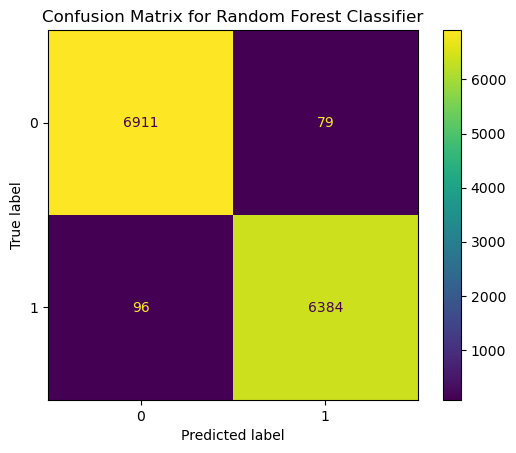

In [133]:
cm_test_2 = confusion_matrix(y_test,y_pred_test_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_2, display_labels=rfc.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Random Forest Classifier')
plt.show()

It's very impressive! All 3 models show very high rate of predicting fake news.
I decided to play around with the title. I will use only words. But often fake news use the exclamation marks to attract readers. As well maybe interesting to analyze the size of the news. According to research I read - fake news are shorter
and have easier language. 

## CHECKING predictions with titles only

In [134]:
merged_copy_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [135]:
merged_copy_df=merged_copy_df.drop(['text','subject', 'date'], axis=1)

In [136]:
merged_copy_df=merged_copy_df.sample(frac=1)
merged_copy_df.reset_index(inplace=True)

In [137]:
merged_copy_df

,index,title,label
0,10577,CNN’s Jim Acosta Goes Bonkers Waving His Hands...,0
1,16038,"Blast hits Afghan capital Kabul, numerous casu...",1
2,5461,"REPORT: If Trump Builds A Border Wall, We’ll ...",0
3,21472,FOR BERNIE SANDERS FANS: Prisoners Eating Cats...,0
4,19669,Turkey not in direct talks for return of intel...,1
...,...,...,...
44893,5481,WATCH: White Confederate Flag-Waving Redneck ...,0
44894,5474,This Liberal Group Found The BEST Way To Ruin...,0
44895,16860,Islamic State claims responsibility for attack...,1
44896,6566,Trump says he had a 'very good talk' with Obam...,1


In [138]:
merged_copy_df.drop(['index'], axis=1, inplace=True)

In [139]:
merged_copy_df

,title,label
0,CNN’s Jim Acosta Goes Bonkers Waving His Hands...,0
1,"Blast hits Afghan capital Kabul, numerous casu...",1
2,"REPORT: If Trump Builds A Border Wall, We’ll ...",0
3,FOR BERNIE SANDERS FANS: Prisoners Eating Cats...,0
4,Turkey not in direct talks for return of intel...,1
...,...,...
44893,WATCH: White Confederate Flag-Waving Redneck ...,0
44894,This Liberal Group Found The BEST Way To Ruin...,0
44895,Islamic State claims responsibility for attack...,1
44896,Trump says he had a 'very good talk' with Obam...,1


In [140]:
merged_copy_df['title']=merged_copy_df['title'].apply(functions.clean_up)

In [141]:
X_title = merged_copy_df["title"]
y_title = merged_copy_df["label"]

In [142]:
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title, y_title, test_size=0.3)

In [143]:
vectorization_title = TfidfVectorizer()
X_vect_train_title = vectorization_title.fit_transform(X_train_title)
X_vect_test_title = vectorization_title.transform(X_test_title)

In [144]:
filename = "../Vectorizers/vectorization_title.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(vectorization_title,file)

Logistic regression for titles set

In [145]:
lr_title= LogisticRegression()
lr_title.fit(X_vect_train_title,y_train_title)

LogisticRegression()

In [146]:
filename = "../Models/lr_title.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(lr_title,file) # store it #after fitting we save it

In [147]:
y_pred_test_title=lr_title.predict(X_vect_test_title)
lr_title.score(X_vect_test_title, y_test_title)
print("The accuracy of the model in the Test set is: ",round(lr_title.score(X_vect_test_title, y_test_title),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test_title, y_pred_test_title)))
print(classification_report(y_test_title, y_pred_test_title))

The accuracy of the model in the Test set is:  0.949
The Kappa in the Test set is: 0.90
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7070
           1       0.94      0.96      0.95      6400

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [148]:
y_pred_train_title=lr_title.predict(X_vect_train_title)
lr_title.score(X_vect_train_title, y_train_title)
print("The accuracy of the model in the Test set is: ",round(lr_title.score(X_vect_train_title, y_train_title),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_train_title, y_pred_train_title)))
print(classification_report(y_train_title, y_pred_train_title))

The accuracy of the model in the Test set is:  0.97
The Kappa in the Test set is: 0.94
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16411
           1       0.96      0.98      0.97     15017

    accuracy                           0.97     31428
   macro avg       0.97      0.97      0.97     31428
weighted avg       0.97      0.97      0.97     31428



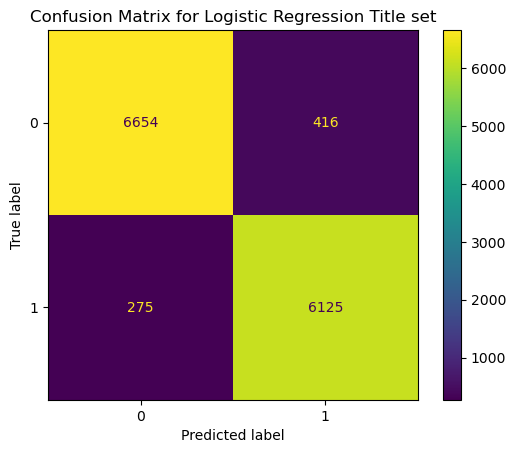

In [149]:
cm_test_3 = confusion_matrix(y_test_title,y_pred_test_title)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_3, display_labels=lr_title.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Logistic Regression Title set')
plt.show()

Random Forest Classifier for title set

In [150]:
rfc_title= RandomForestClassifier()
rfc_title.fit(X_vect_train_title,y_train_title)

RandomForestClassifier()

In [151]:
filename = "../Models/rfc_title.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(rfc_title,file) # store it #after fitting we save it

In [152]:
y_pred_test_title_rfc=rfc_title.predict(X_vect_test_title)
rfc_title.score(X_vect_test_title, y_test_title)
print("The accuracy of the model in the Test set is: ",round(rfc_title.score(X_vect_test_title, y_test_title),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test_title, y_pred_test_title_rfc)))
print(classification_report(y_test_title, y_pred_test_title_rfc))

The accuracy of the model in the Test set is:  0.944
The Kappa in the Test set is: 0.89
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7070
           1       0.93      0.95      0.94      6400

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



## Passive Aggresive Classifier - for Title set

In [153]:
pac_title=PassiveAggressiveClassifier(max_iter=50)
pac_title.fit(X_vect_train_title,y_train_title)

PassiveAggressiveClassifier(max_iter=50)

In [154]:
filename = "../Models/pac_title.pickle" # Path with filename
with open(filename, "wb") as file: 
        pickle.dump(pac_title,file)

In [155]:
y_pred_test_pac_title=pac_title.predict(X_vect_test_title)
print("The accuracy of the model in the Test set is: ",round(pac_title.score(X_vect_test_title, y_test_title),3))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test_title, y_pred_test_pac_title)))
print(classification_report(y_test_title, y_pred_test_pac_title))

The accuracy of the model in the Test set is:  0.949
The Kappa in the Test set is: 0.90
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7070
           1       0.95      0.94      0.95      6400

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [156]:
#vectorization = functions.load("../Vectorizers/vectorization.pickle")

Checking on features of titles and passive agressive classifier

In [157]:
words = [key for key in vectorization_title.vocabulary_.keys()]


In [158]:
pac_title.coef_[0]

array([ 0.        ,  0.        ,  0.        , ...,  1.83392354,
       -0.00388007, -0.38504337])

In [159]:
pac_features_importances_abs_title = [(abs(item[0]),item[0],item [1]) for item in zip(pac_title.coef_[0].tolist(),words)]
pac_features_importances_abs_title.sort(reverse=(True))
pac_features_importances_abs_title[:10]

[(17.897257979812306, -17.897257979812306, 'largesse'),
 (10.828561966148758, -10.828561966148758, 'world'),
 (9.786258534954337, -9.786258534954337, 'partial'),
 (8.940434639451068, -8.940434639451068, 'assess'),
 (8.785559444343034, -8.785559444343034, 'prevents'),
 (8.565095084477548, -8.565095084477548, 'disgust'),
 (8.498182865894556, -8.498182865894556, 'maple'),
 (8.307662993124271, 8.307662993124271, 'enthusiast'),
 (8.302993077174307, -8.302993077174307, 'extravagant'),
 (7.725586284656349, 7.725586284656349, 'individuals')]

# Feature importances

## Logistic Regression model

In [160]:
words = [key for key in vectorization_text.vocabulary_.keys()]
# [(coef,key)]
lr_features_importances_abs = [(abs(item[0]),item[0],item [1]) for item in zip(lr.coef_[0].tolist(),words)]
lr_features_importances_abs.sort(reverse=(True))
lr_features_importances_abs[:10]

[(22.87325020740579, 22.87325020740579, 'mprc'),
 (19.137610882013316, 19.137610882013316, 'nouri'),
 (9.8144085927609, 9.8144085927609, 'delury'),
 (8.985404804321583, -8.985404804321583, 'inagurationday'),
 (6.3357482744503235, -6.3357482744503235, 'arenius'),
 (6.26243607888079, 6.26243607888079, 'sry'),
 (6.098684133919257, -6.098684133919257, 'harmonizing'),
 (5.709878980129881, 5.709878980129881, 'karate'),
 (4.963338753215813, -4.963338753215813, 'directionally'),
 (4.65762743012022, -4.65762743012022, 'hadley')]

## Random Forest Classfier

In [161]:
rfc.feature_importances_
rfc_features_importances_abs = [(abs(item[0]),item[0],item [1]) for item in zip(rfc.feature_importances_.tolist(),words)]
rfc_features_importances_abs.sort(reverse=(True))
rfc_features_importances_abs[:10]

[(0.044465637886739656, 0.044465637886739656, 'mprc'),
 (0.02790678203942742, 0.02790678203942742, 'nouri'),
 (0.01569580680330255, 0.01569580680330255, 'inagurationday'),
 (0.011492554681128976, 0.011492554681128976, 'delury'),
 (0.007917271551293827, 0.007917271551293827, 'lowcock'),
 (0.007759216377507499, 0.007759216377507499, 'circa'),
 (0.007393931649614502, 0.007393931649614502, 'zacaria'),
 (0.007100149490554184, 0.007100149490554184, 'abbreviates'),
 (0.0067183099454902724, 0.0067183099454902724, 'weaknesses'),
 (0.0065560726070458845, 0.0065560726070458845, 'hadley')]

## Passive Agressive Classifier

In [162]:
pac_features_importances_abs = [(abs(item[0]),item[0],item [1]) for item in zip(pac.coef_[0].tolist(),words)]
pac_features_importances_abs.sort(reverse=(True))
pac_features_importances_abs[:10]

[(24.97751283666042, 24.97751283666042, 'mprc'),
 (12.510115814194476, -12.510115814194476, 'inagurationday'),
 (9.235853821406375, 9.235853821406375, 'nouri'),
 (7.895692418062816, -7.895692418062816, 'directionally'),
 (5.725486664897377, 5.725486664897377, 'delury'),
 (5.129240640784158, -5.129240640784158, 'zacaria'),
 (5.066415860232255, -5.066415860232255, 'slaughterhouse'),
 (4.774985440037104, -4.774985440037104, 'weaknesses'),
 (4.762525905073536, 4.762525905073536, 'sry'),
 (4.589184652539806, -4.589184652539806, 'arenius')]

## Making a Word Cloud

In [163]:
merged_df['text_processed']=merged_df['text'].apply(functions.clean_up)

In [164]:
merged_df['text_processed']=merged_df['text_processed'].apply(functions.tokenize)

In [165]:
#Creating a list from fake news to apply for word cloud
list_fake = []

for l in merged_df[merged_df['label']==0]['text_processed']:
    list_fake += l


#print(list_fake) don't print - it works , but computer goes crazy

In [166]:
fake_string = " ".join(cat for cat in list_fake)

In [167]:
word_cloud_fake = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(fake_string)

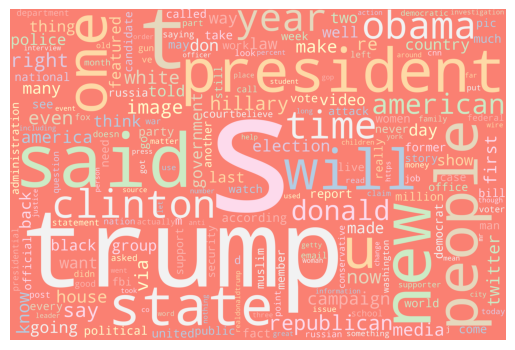

In [168]:
# Display the generated Word Cloud
plt.imshow(word_cloud_fake)
plt.axis("off")
plt.show()

In [169]:
list_real= []

for l in merged_df[merged_df['label']==1]['text_processed']:
    list_real += l

In [170]:
real_string = " ".join(cat for cat in list_real)

In [171]:
word_cloud_real = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(real_string)

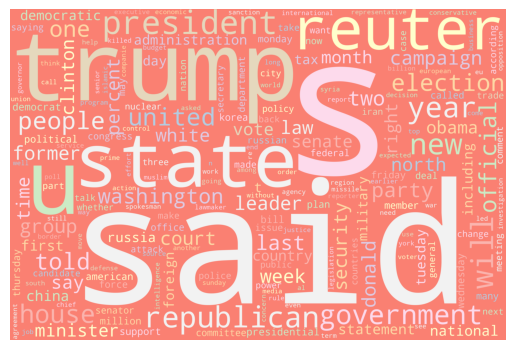

In [172]:
plt.imshow(word_cloud_real)
plt.axis("off")
plt.show()